<h1><center> A short illustration of SVD in python: image/data compression </center></h1>

<center> Abstract: These are notes for a seminar to an audience of physicists, engineers and other scientists.
</center>

<center> R.Monteiro, MathAM-OIL, Japan</center> 

<center> July, 2019 </center> 

To begin with, we import the libraries we will need

In [63]:
import numpy as np

from PIL import Image, ImageFilter
from IPython.display import display # to display images

%matplotlib inline
import matplotlib.pyplot as plt


Now we import the picture we are using: in this case, a picture from the classical "7 Samurais", by Akira Kurosawa

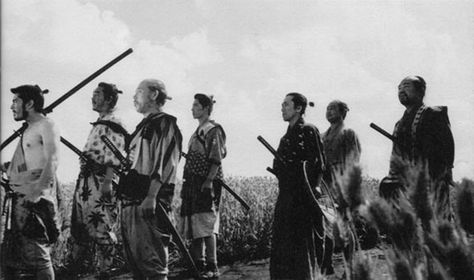

In [64]:
image = Image.open("7-samurais.jpg")
#image = image.filter(ImageFilter.SHARPEN )
display(image)

We can now import this matrix as a numpy matrix

In [7]:
pixels = np.asarray(image)

whose size is

In [8]:
np.shape(pixels)

(280, 474)

<h2><center> The SVD decomposition </center></h2>

In Python, the SVD decomposition is part of the numpy library. There are two things that we can do: the full decomposition

In [9]:
u_full,sigma_full, v_full = np.linalg.svd(pixels,full_matrices=True)
print("which give us matrices of size\n U_full:",np.shape(u_full),"\n Sigma_full:", np.shape(sigma_full),"\n V_full:",np.shape(v_full))

which give us matrices of size
 U_full: (280, 280) 
 Sigma_full: (280,) 
 V_full: (474, 474)


Note that Sigma is a "rank one vector".


It is also possible to get a more economic, not full decomposition

In [10]:
u_not_full,sigma_not_full, v_not_full = np.linalg.svd(pixels,full_matrices=False)
print("which give us matrices of size\n U_not_full:",np.shape(u_not_full),"\n Sigma_not_full:", np.shape(sigma_not_full),"\n V_not_full:",np.shape(v_not_full))

which give us matrices of size
 U_not_full: (280, 280) 
 Sigma_not_full: (280,) 
 V_not_full: (280, 474)


In case you have not noticed: the size of the last matrix is different.

If you want, you can check the unitary property of the matrices (u/v)_full and (u/v)_not_full:



In [11]:
u_full.T*u_full

array([[ 7.63198188e-03, -4.79747028e-03,  2.83812115e-03, ...,
        -5.13011969e-04, -2.52807927e-03, -4.07130650e-04],
       [-4.79747028e-03,  2.97510170e-03, -1.83064399e-03, ...,
        -7.72004523e-05, -1.10895181e-03, -3.16291319e-04],
       [ 2.83812115e-03, -1.83064399e-03,  1.08105239e-03, ...,
         5.51120554e-04,  6.97177327e-03,  9.07070618e-04],
       ...,
       [-5.13011969e-04, -7.72004523e-05,  5.51120554e-04, ...,
         1.65585673e-03,  5.72570851e-04,  2.86004903e-04],
       [-2.52807927e-03, -1.10895181e-03,  6.97177327e-03, ...,
         5.72570851e-04,  3.72562425e-05, -1.25305845e-04],
       [-4.07130650e-04, -3.16291319e-04,  9.07070618e-04, ...,
         2.86004903e-04, -1.25305845e-04,  2.67646492e-04]])

Wait... shouldn't it be the identity matrix?!

Well... what happens is that the "*" symbols stands for \textit{termwise multiplication}! If you wanto do to a matrix multiplication you have to use the numpy package. For instace, we can compare the product with the identity matrix, and than compute the norm. If the numerical result is good we should get a very small number:

In [12]:
np.linalg.norm(np.matmul(np.conjugate(u_full).T,u_full) - np.identity(np.shape(u_full)[1]))

3.5525321695706e-14

which is indeed the case.

<h2><center> The singular values </center></h2>

In general the singular values are ordered in decreasing order of magnitude. Let's plot them:

Text(0, 0.5, 'Magnitude')

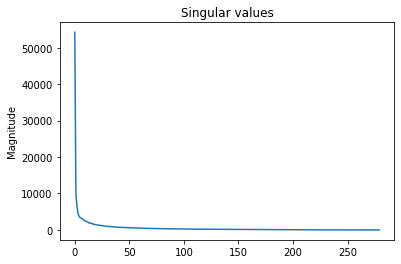

In [14]:
plt.plot(sigma_full)
plt.title("Singular values")
plt.ylabel("Magnitude")

We can see that a good part of the energy of this matrix is contained in the first 30~50 singular eigenvalues.


<h2><center> Constructing Rank k approximating images </center></h2>

Now let's play a bit: we shall use the best rank-k matrix to approximate our matrix. We can construct that as follows:

In [15]:
def reconstruct_image_function(k,u, sigma, v):
    return np.matmul(u_full[:,:k]*sigma_full[:k],v_full[:k,:])

k = 2  # rank of the matrix, that is, number of non-null singular values.
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)

Notice that this matrix has the same size as the previous mnatrix, that is,


In [16]:
np.shape(reconstruct_image)

(280, 474)

Now we transform this matrix of numbers to an image format, so that we can visualize it.

A rank 2 image:


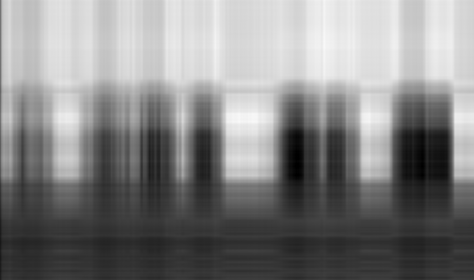

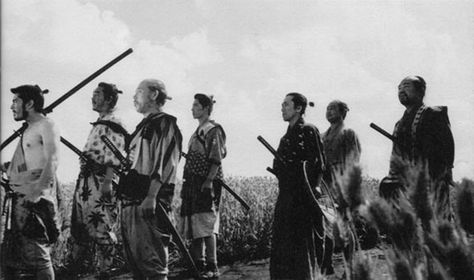

In [17]:
def display_image_function(k,image_as_array):
    img = Image.fromarray(image_as_array)
    img_p = img.convert('L')
    print("A rank",k, "image:")
    display(img_p,image)
    
display_image_function(k,reconstruct_image)

As you make the value of k larger you get better quality images (approximations, in the $l^2$ norm):

A rank 4 image:


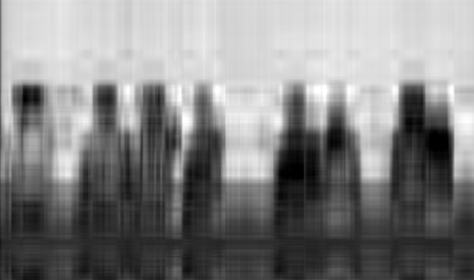

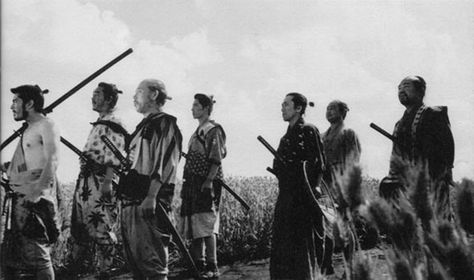

In [18]:
k=4
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)    
display_image_function(k,reconstruct_image)

A rank 8 image:


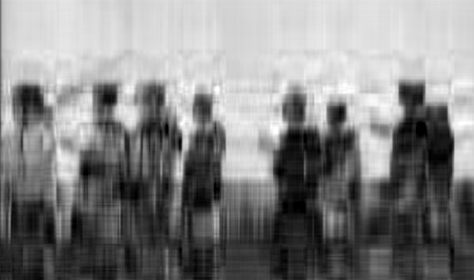

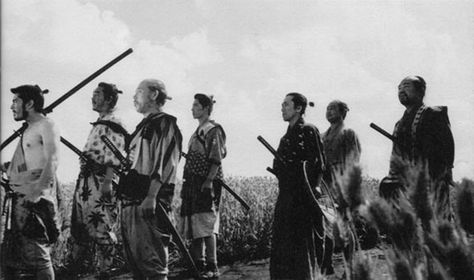

In [19]:
k=8
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)    
display_image_function(k,reconstruct_image)

A rank 16 image:


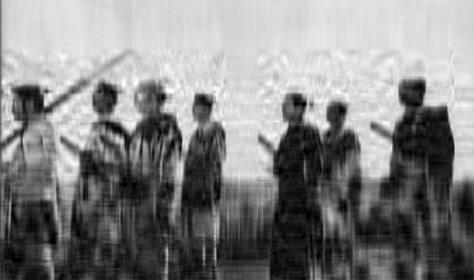

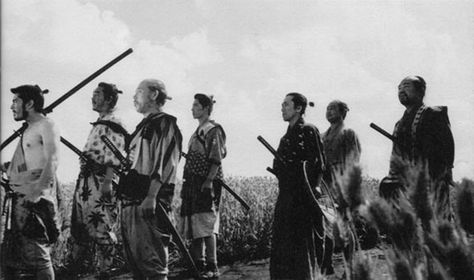

In [20]:
k=16
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)    
display_image_function(k,reconstruct_image)

A rank 32 image:


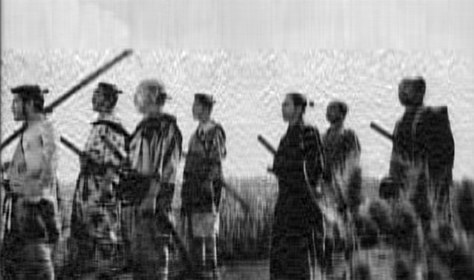

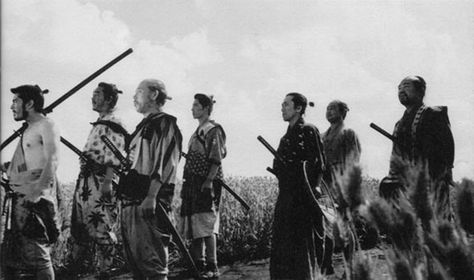

In [21]:
k=32
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)    
display_image_function(k,reconstruct_image)

A rank 64 image:


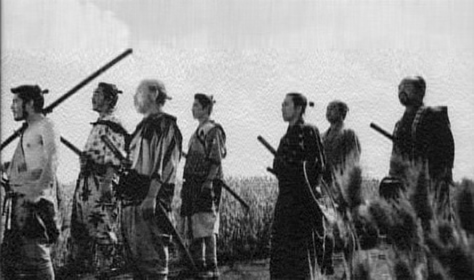

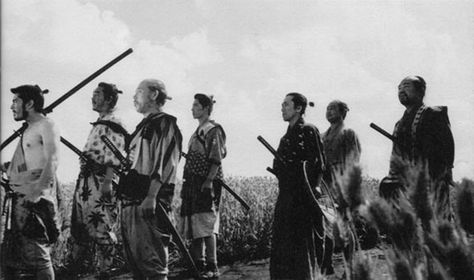

In [22]:
k=64
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)
display_image_function(k,reconstruct_image)

A rank 128 image:


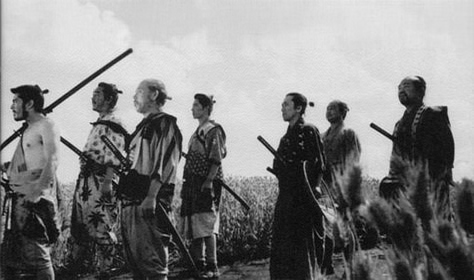

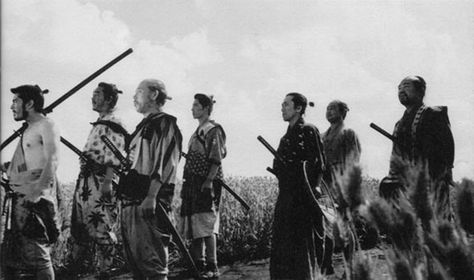

In [62]:
k=128
reconstruct_image = reconstruct_image_function(k,u_full, sigma_full, v_full)
display_image_function(k,reconstruct_image)